# Data Collection

## Combining dataset
Do yêu cầu dataset phải có tối thiểu 1000 dòng $\rightarrow$ nhóm quyết định gộp 2 file `.csv` trong tập dataset **Student Alcohol Consumption** gồm `student-mat.csv` và `student-por.csv` (2 file đều có chung các thuộc tính) thành `student-combine.csv` (có thêm thuộc tính `subject` cho `mat` và `por`) để xử lý cho các bước kế tiếp

In [ ]:
import pandas as pd

df_mat = pd.read_csv("../data/raw/student-mat.csv")
df_por = pd.read_csv("../data/raw/student-por.csv")

In [ ]:
# Thêm giá trị cho thuộc tính subject
df_mat['subject'] = 'mat'
df_por['subject'] = 'por'

In [13]:
# Gộp 2 data frame
df_combine = pd.concat([df_mat, df_por], axis=0, ignore_index=True)

df_combine.to_csv("../data/raw/student-combine.csv", index=False)

## Why choose this dataset?
- Nhóm chọn dataset **Student Alcohol Consumption** vì tính thực tiễn và dữ liệu đa dạng. Dataset giúp người đọc có một cái nhìn khách quan về các yếu tố tác động, từ môi trường đến hoạt động hàng ngày, có ảnh hưởng như thế nào đến hành vi tiêu thụ cồn. Từ đó, nhóm có thể phân tích và đánh giá tác động thực tế của lối sống lên hiệu suất học tập (môn toán và môn tiếng Bồ Đào Nha) của học sinh trung học.

- Một số câu hỏi và insight tiềm năng có thể tìm thấy ở dataset này:
    1. Câu hỏi về hiệu suất học tập: mức độ tiêu thụ cồn (hàng ngày và cuối tuần) có mối liên hệ như thế nào đến kết quả học tập hay không?

    2. Câu hỏi về môi trường và xã hội: liệu học sinh dành nhiều thời gian đi chơi, hay ở trong một mối quan hệ tình cảm thường sẽ tiêu thụ cồn nhiều hơn hay không?

    3. Câu hỏi về gia đình: trình độ học vấn của ba, mẹ và sự ổn định trong gia đình có ảnh hưởng đến hành vi uống rượu của con cái hay không?

    4. Câu hỏi về sức khoẻ, đi học: tình trạng sức khoẻ hay số ngày nghỉ học có phản ánh sớm việc sa sút trong học tập?

# Data Exploration

## Categorical Columns Analysis

In [15]:
df = pd.read_csv("../data/raw/student-combine.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,por
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,por
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,por
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,por


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no,por
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673,649


In [81]:
def distribution_category(colname, df):
    print(f"Categorical column: {colname}\n")

    unique_count = df[colname].nunique()
    print(f"Unique value: {unique_count}")
    
    val_counts = df[colname].value_counts()
    top_5 = val_counts.head(5)
    
    print(f"Top 5 most frequent value: {top_5}\n")
    
    print(f"Visualization")
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[colname], order=val_counts.index)
    plt.title(f'Distribution of {colname}')
    plt.show()
    
    print(f"Percentage distribution")
    distributions = df[colname].value_counts(normalize= True) * 100
    for uni, val in zip(df[colname].unique(), distributions):
        print(f"{uni} : {val:.2f}%")

In [82]:
def data_quality_category(colname, df):
    missing_count = df[colname].isnull().sum()
    missing_percent = (missing_count / len(df[colname])) * 100
    print(f"Percent of missing value: {missing_percent}%")

### Column `school`

Categorical column: school

Unique value: 2
Top 5 most frequent value: school
GP    772
MS    272
Name: count, dtype: int64

Visualization


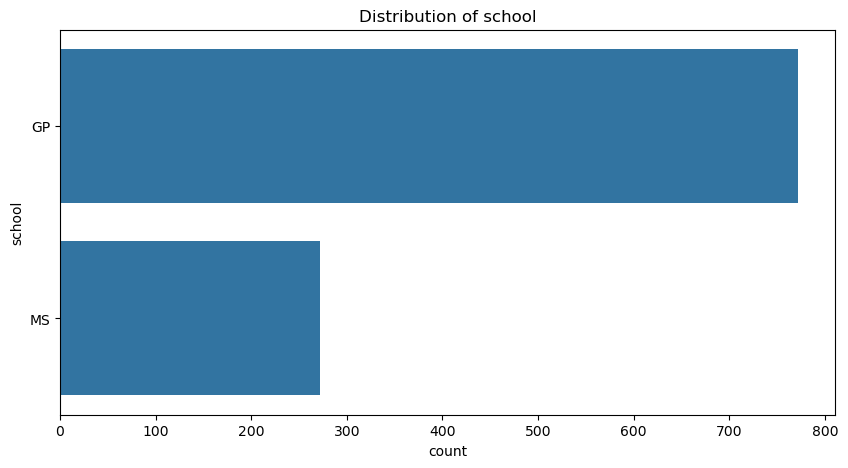

Percentage distribution
GP : 73.95%
MS : 26.05%


In [83]:
distribution_category("school", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng

In [84]:
data_quality_category("school", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `sex`

Categorical column: sex

Unique value: 2
Top 5 most frequent value: sex
F    591
M    453
Name: count, dtype: int64

Visualization


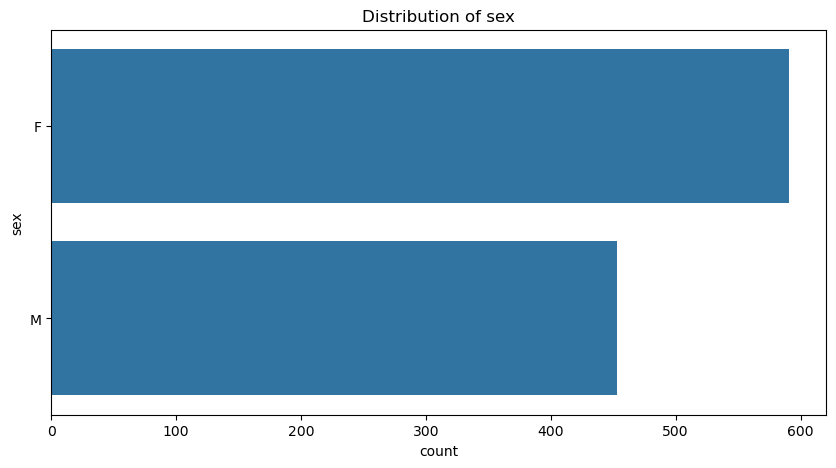

Percentage distribution
F : 56.61%
M : 43.39%


In [85]:
distribution_category("sex", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng thấp

In [86]:
data_quality_category("sex", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `address`

Categorical column: address

Unique value: 2
Top 5 most frequent value: address
U    759
R    285
Name: count, dtype: int64

Visualization


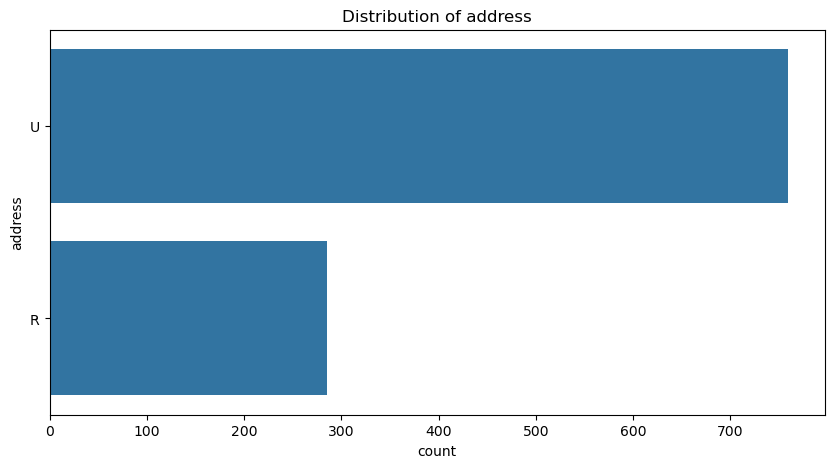

Percentage distribution
U : 72.70%
R : 27.30%


In [87]:
distribution_category("address", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng cao

In [88]:
data_quality_category("address", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `famsize`

Categorical column: famsize

Unique value: 2
Top 5 most frequent value: famsize
GT3    738
LE3    306
Name: count, dtype: int64

Visualization


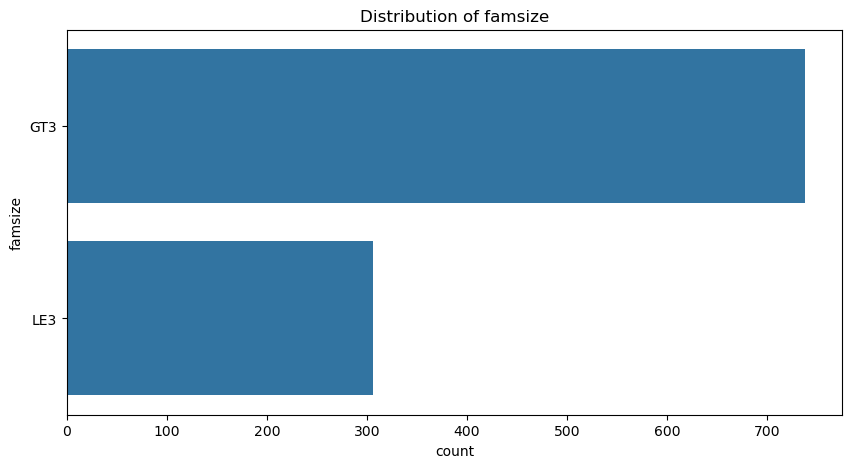

Percentage distribution
GT3 : 70.69%
LE3 : 29.31%


In [89]:
distribution_category("famsize", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng cao

In [90]:
data_quality_category("famsize", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `Pstatus`

Categorical column: Pstatus

Unique value: 2
Top 5 most frequent value: Pstatus
T    923
A    121
Name: count, dtype: int64

Visualization


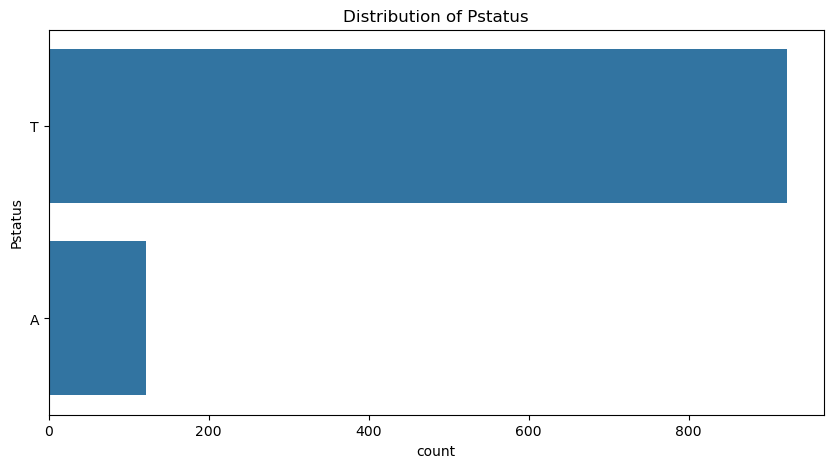

Percentage distribution
A : 88.41%
T : 11.59%


In [91]:
distribution_category('Pstatus', df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng cao

In [94]:
data_quality_category("Pstatus", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `Mjob`

Categorical column: Mjob

Unique value: 5
Top 5 most frequent value: Mjob
other       399
services    239
at_home     194
teacher     130
health       82
Name: count, dtype: int64

Visualization


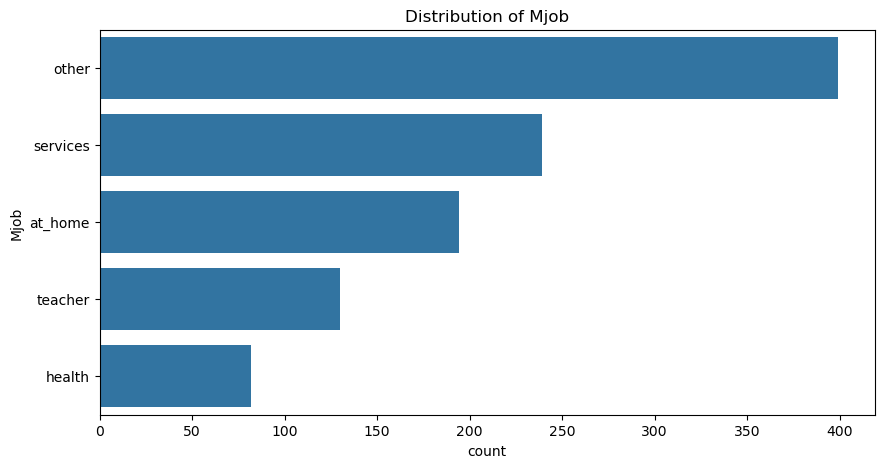

Percentage distribution
at_home : 38.22%
health : 22.89%
other : 18.58%
services : 12.45%
teacher : 7.85%


In [92]:
distribution_category("Mjob", df)

In [93]:
data_quality_category("Mjob", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `Fjob`

Categorical column: Fjob

Unique value: 5
Top 5 most frequent value: Fjob
other       584
services    292
teacher      65
at_home      62
health       41
Name: count, dtype: int64

Visualization


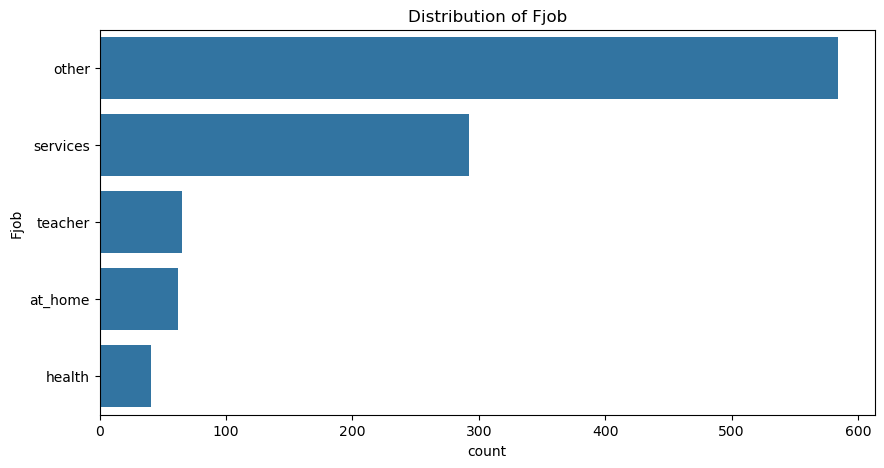

Percentage distribution
teacher : 55.94%
other : 27.97%
services : 6.23%
health : 5.94%
at_home : 3.93%


In [95]:
distribution_category("Fjob", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng

In [96]:
data_quality_category("Fjob", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `reason`

Categorical column: reason

Unique value: 4
Top 5 most frequent value: reason
course        430
home          258
reputation    248
other         108
Name: count, dtype: int64

Visualization


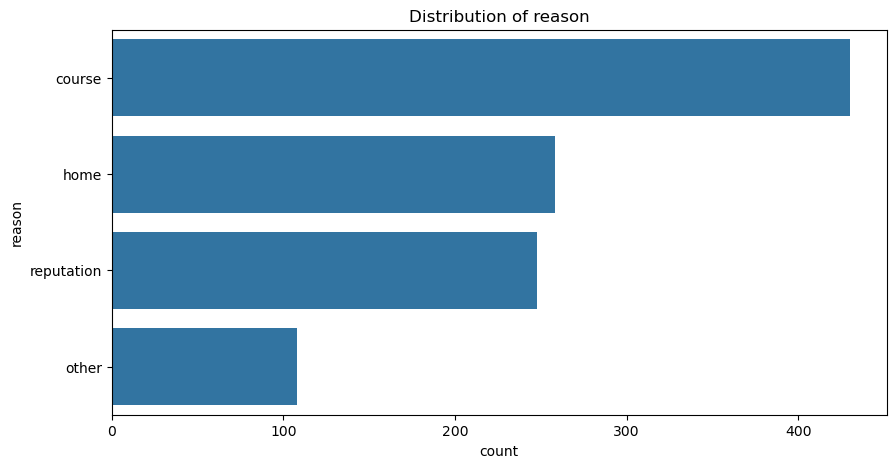

Percentage distribution
course : 41.19%
other : 24.71%
home : 23.75%
reputation : 10.34%


In [97]:
distribution_category("reason", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng

In [98]:
data_quality_category("reason", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `guardian`

Categorical column: guardian

Unique value: 3
Top 5 most frequent value: guardian
mother    728
father    243
other      73
Name: count, dtype: int64

Visualization


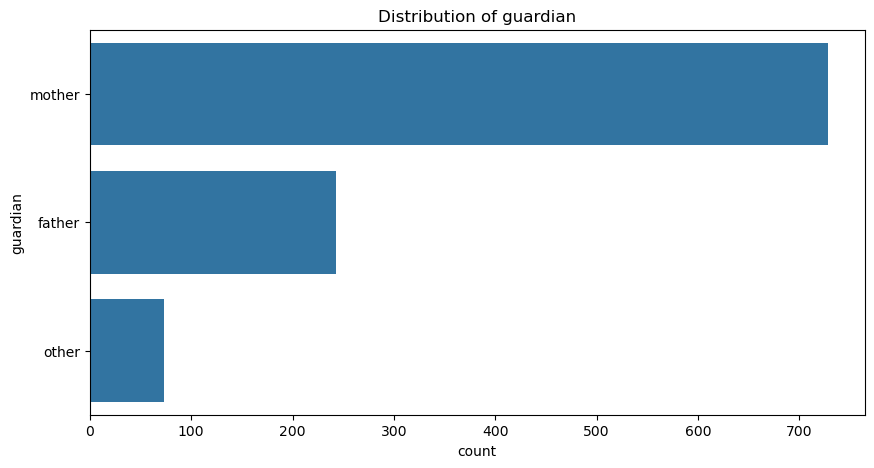

Percentage distribution
mother : 69.73%
father : 23.28%
other : 6.99%


In [99]:
distribution_category("guardian", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng

In [100]:
data_quality_category("guardian", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `schoolsup`

Categorical column: schoolsup

Unique value: 2
Top 5 most frequent value: schoolsup
no     925
yes    119
Name: count, dtype: int64

Visualization


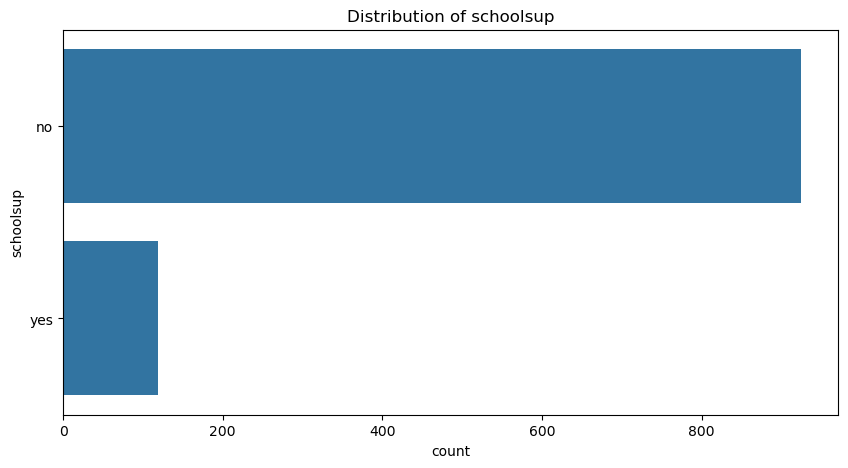

Percentage distribution
yes : 88.60%
no : 11.40%


In [101]:
distribution_category("schoolsup", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng cao

In [102]:
data_quality_category("schoolsup", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `famsup`

Categorical column: famsup

Unique value: 2
Top 5 most frequent value: famsup
yes    640
no     404
Name: count, dtype: int64

Visualization


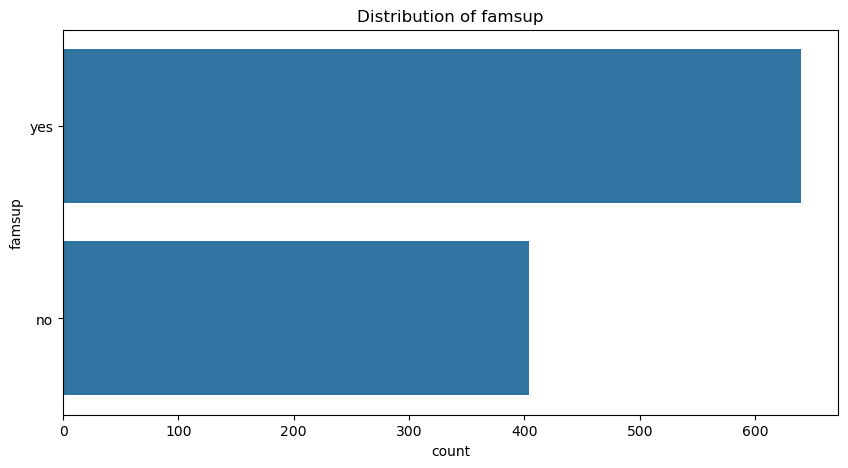

Percentage distribution
no : 61.30%
yes : 38.70%


In [103]:
distribution_category("famsup", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng nhẹ

In [104]:
data_quality_category("famsup", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `paid`

Categorical column: paid

Unique value: 2
Top 5 most frequent value: paid
no     824
yes    220
Name: count, dtype: int64

Visualization


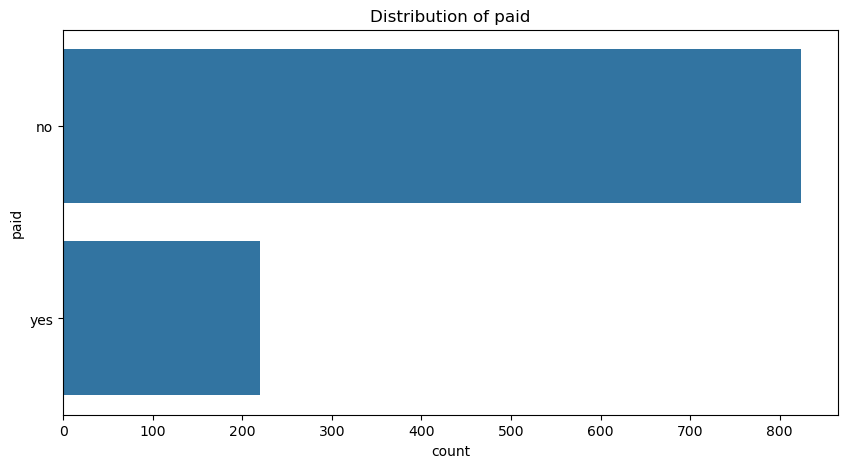

Percentage distribution
no : 78.93%
yes : 21.07%


In [105]:
distribution_category("paid", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng cao

In [106]:
data_quality_category("paid", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `activities`

Categorical column: activities

Unique value: 2
Top 5 most frequent value: activities
no     528
yes    516
Name: count, dtype: int64

Visualization


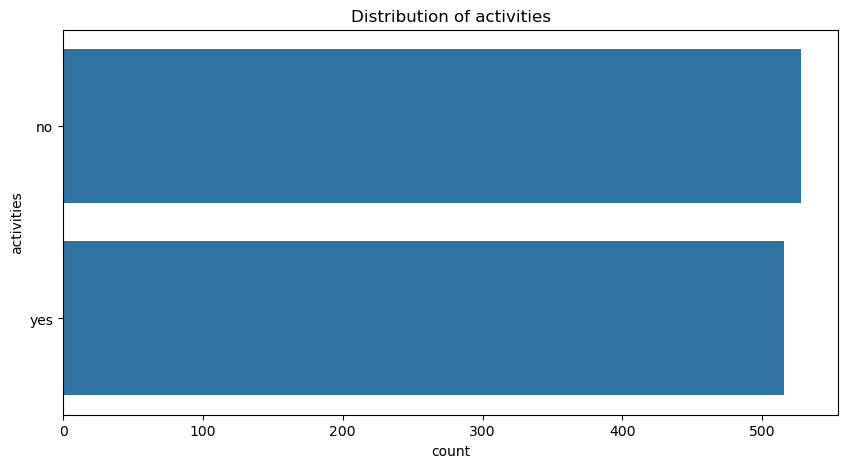

Percentage distribution
no : 50.57%
yes : 49.43%


In [107]:
distribution_category("activities", df)

$\rightarrow$ Cột dữ liệu khá cân bằng

In [108]:
data_quality_category("activities", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `nursery`

Categorical column: nursery

Unique value: 2
Top 5 most frequent value: nursery
yes    835
no     209
Name: count, dtype: int64

Visualization


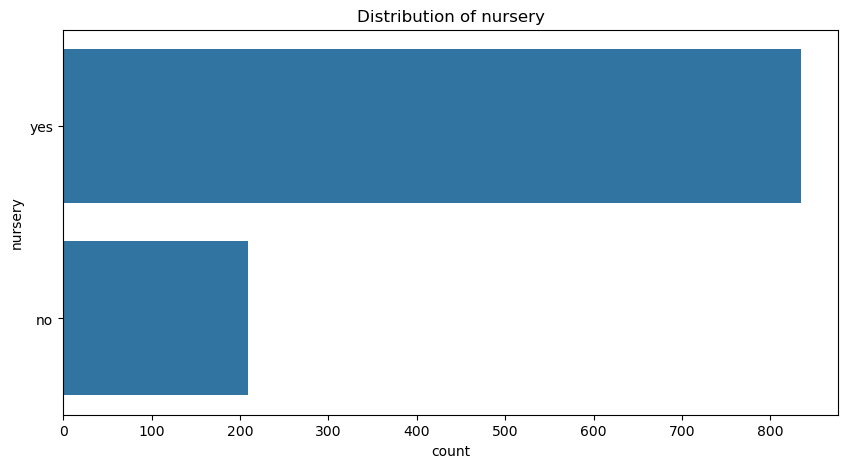

Percentage distribution
yes : 79.98%
no : 20.02%


In [109]:
distribution_category("nursery", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng

In [110]:
data_quality_category("nursery", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `higher`

Categorical column: higher

Unique value: 2
Top 5 most frequent value: higher
yes    955
no      89
Name: count, dtype: int64

Visualization


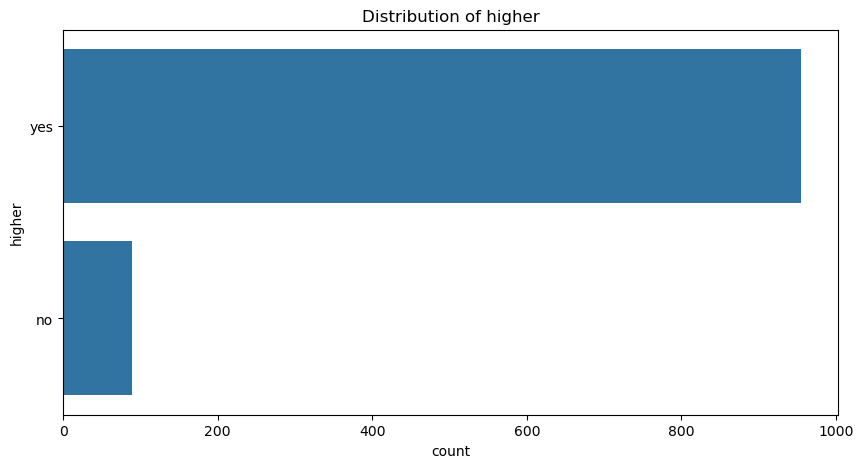

Percentage distribution
yes : 91.48%
no : 8.52%


In [111]:
distribution_category("higher", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng

In [112]:
data_quality_category("higher", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `internet`

Categorical column: internet

Unique value: 2
Top 5 most frequent value: internet
yes    827
no     217
Name: count, dtype: int64

Visualization


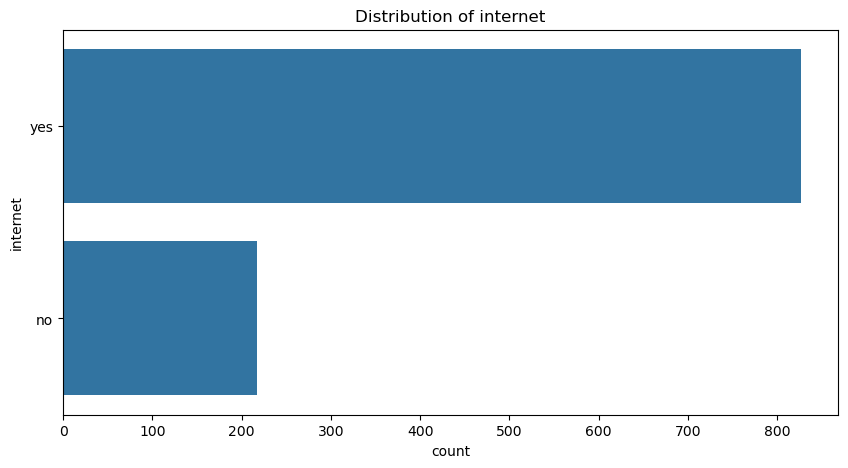

Percentage distribution
no : 79.21%
yes : 20.79%


In [113]:
distribution_category("internet", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng cao

In [114]:
data_quality_category("internet", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### Column `romantic`

Categorical column: romantic

Unique value: 2
Top 5 most frequent value: romantic
no     673
yes    371
Name: count, dtype: int64

Visualization


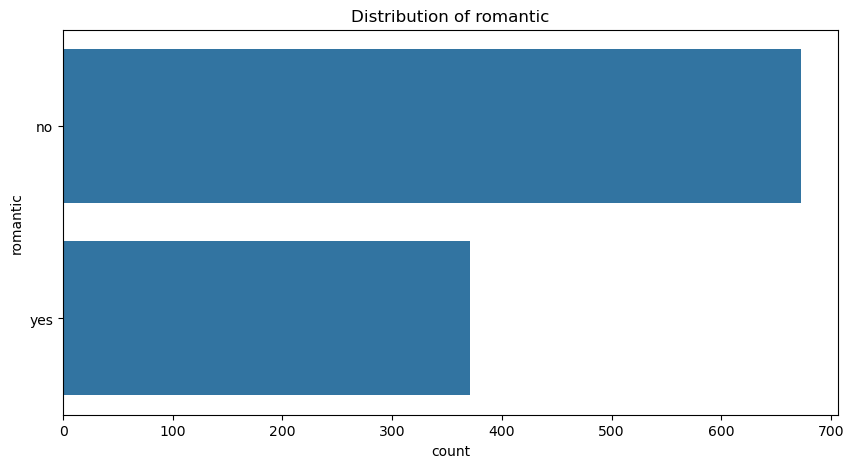

Percentage distribution
no : 64.46%
yes : 35.54%


In [115]:
distribution_category("romantic", df)

$\rightarrow$ Cột dữ liệu bị mất cân bằng

In [116]:
data_quality_category("romantic", df)

Percent of missing value: 0.0%


$\rightarrow$ Cột này không có các giá trị không nhất quán, những giá trị bất thường hay lạ hay giá trị hiếm.

### **Nhận xét:** 
- Các cột dữ liệu category: `school`, `sex`, `address`, `famsize`, `Pstatus`, `Mjob`, `Fjob`, `reason`, `guardian`, `schoolsup`, `famsup`, `paid`, `activities`, `nursery`, `higher`, `internet`, `romantic`
- Các cột đều bị mất cân bằng dữ liệu (trừ cột `sex` khá cân bằng)
- Và các cột không có các giá trị bất thường, lỗi hay các giá trị hiếm